#              BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

Problem statement: The Term 'deposits' are a major source of income for a bank. 
Your money is invested for a certain rate of interest over a fixed amount of time.
You are provided certain features of client :
age of the client, their job type, their marital status,education,loan,contact(cellullar or telephonic), duration. 
from this we have to predict if the client will subscribe to term deposit.



       TWO FILES ARE THERE HERE
1. train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.   test.csv : Use the trained model to for prediction  


In [54]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [55]:
#load the deposit train dataset
df1 = pd.read_csv("termdeposit_train.csv")
df1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


Here there 17 input variables and one target variable 'subscribed'

In [56]:
#load the deposit train dataset
df2 = pd.read_csv("termdeposit_test.csv")
df2

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [57]:
#shape of the dataset
df1.shape

(31647, 18)

In [58]:
df2.shape

(13564, 17)

In [59]:
# The columns of train dataset
df1.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [60]:
# The columns of test dataset
df2.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

By analysing both the train and test datasets, we can see that we have 17 similar features in the both the dataset
and 'Subscribed' is the target variable which we have to predict

In [8]:
#information about the train dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


Here  8 integer data (int64), 9 object datatype are there in the dataset

In [9]:
#information about the test dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


Here,data types are 8 integer(int64)values  and 10 object values.

In [62]:
#Printing the first 5 rows of the train dataset
df1.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [63]:
#Printing the first 5 rows of the test dataset
df2.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [64]:
#checking for missing values in train dataset
df1.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [65]:
#checking for missing values in test dataset
df2.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

Here there are no missing values present

In [66]:
#count value of subscribed variable
df1['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

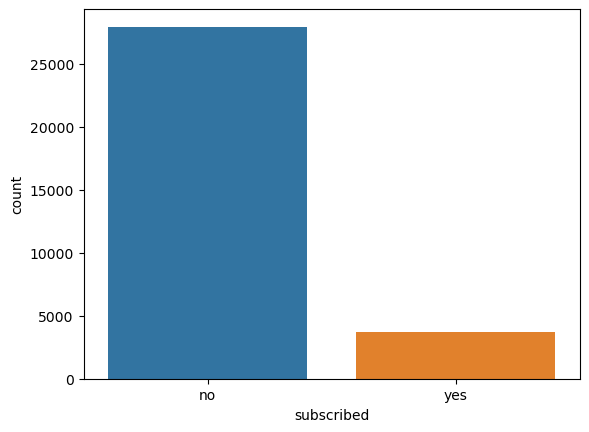

In [68]:
# Plotting the frequency of subsribed variable
sns.countplot(data=df1, x='subscribed')

By analysing the frequency of subscribed,we can see only less number of customers are subscribed 

In [69]:
#frequency of job
df1['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

<AxesSubplot:xlabel='job', ylabel='count'>

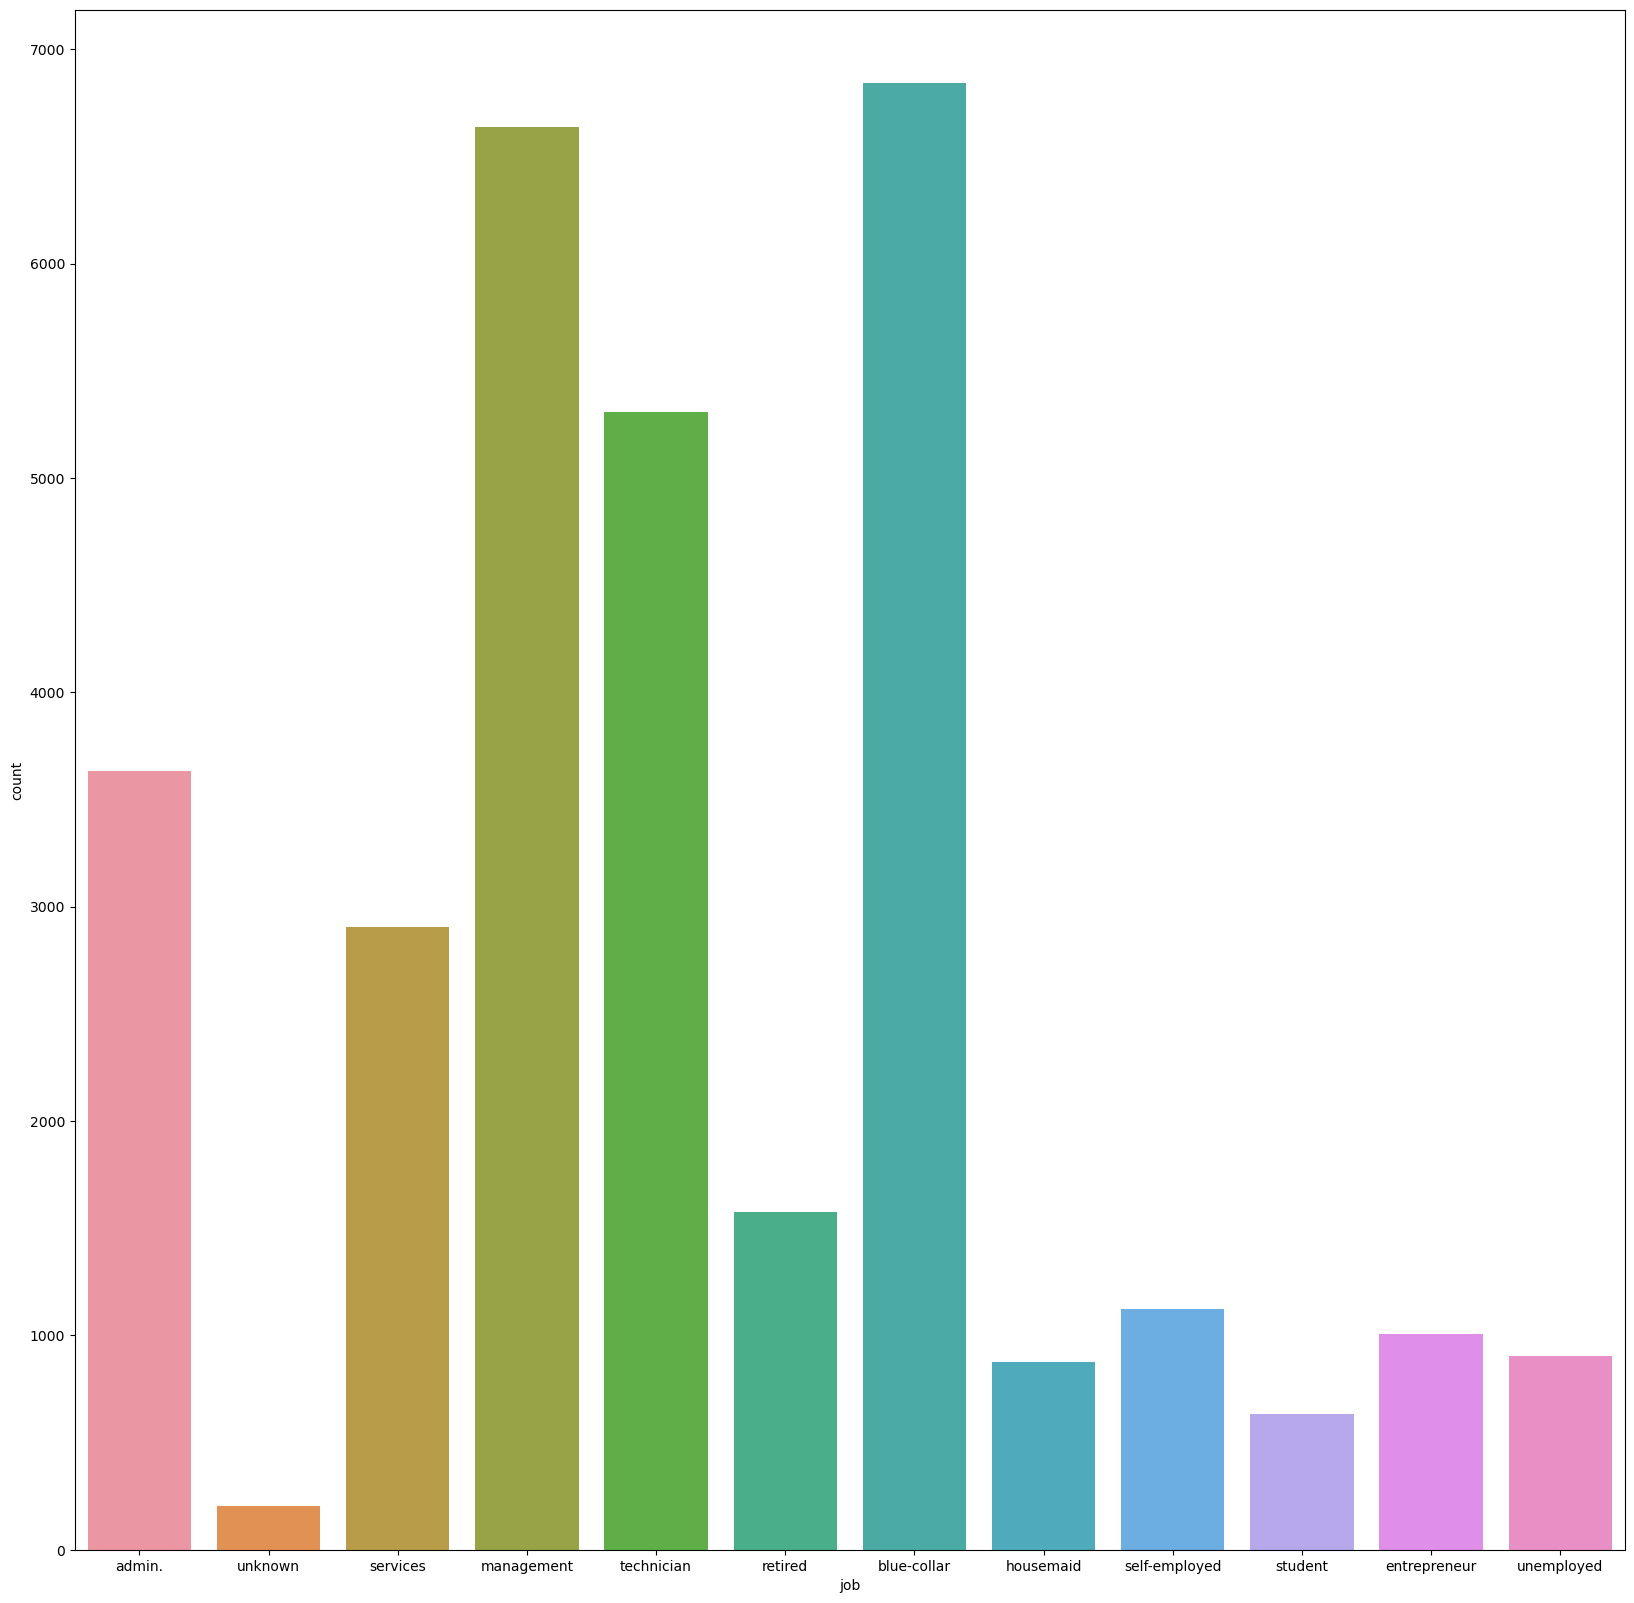

In [70]:
plt.figure(figsize = (20,20))
sns.countplot(data=df1,x='job')

Here we can see that most of the clients belongs  to blue-collar job
students are least they dontmake deposits compared to other jobs. More Job types are Admin, Technician, and blue-collar and it means bank targeting high salaried people

In [71]:
df1['loan'].value_counts()

no     26516
yes     5131
Name: loan, dtype: int64

<AxesSubplot:xlabel='loan', ylabel='count'>

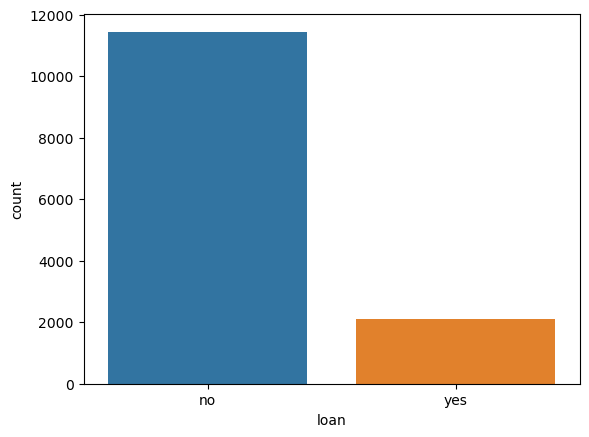

In [19]:
sns.countplot(data=df1, x='loan')

here we can see most of the clients do not take loans.bank gives more importance to the clients who have not taken loans 

<AxesSubplot:xlabel='marital', ylabel='count'>

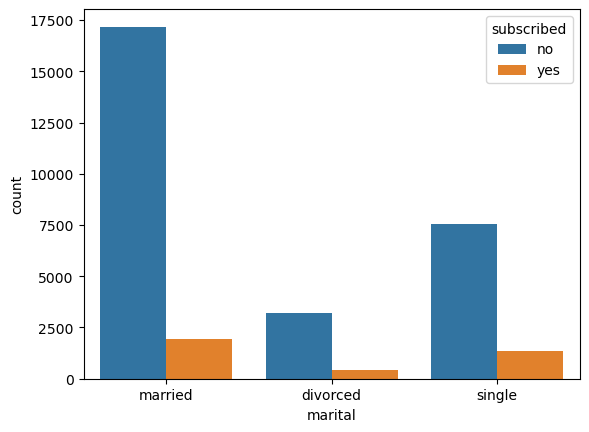

In [72]:
sns.countplot(data=df1, x='marital',hue='subscribed')

<AxesSubplot:xlabel='education', ylabel='count'>

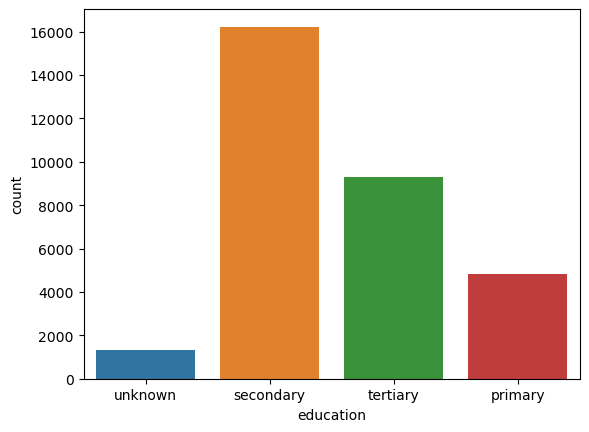

In [73]:
sns.countplot(data=df1, x='education')

Here,Clients count with secondary level of education is very high compared to other education levels.'secondary' and 'tertiary' are more likely to subscribe

<AxesSubplot:xlabel='poutcome', ylabel='count'>

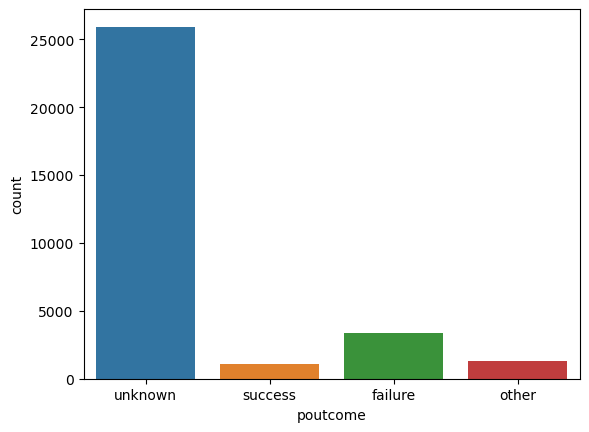

In [74]:
sns.countplot(data=df1, x='poutcome')

<AxesSubplot:xlabel='age', ylabel='Density'>

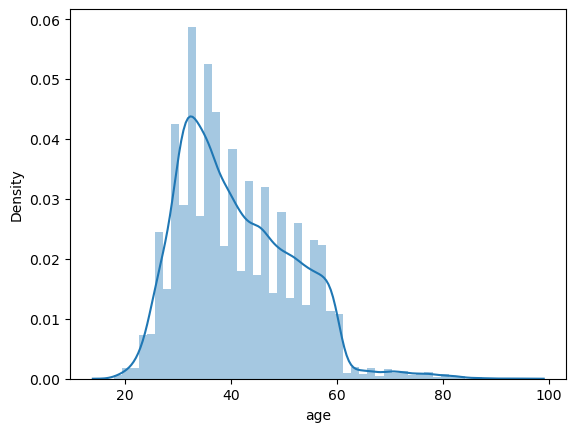

In [75]:
sns.distplot(df1['age'])

Here,clients fall under the age between 20-60

In [76]:
s=df1.groupby('job')['subscribed'].value_counts()

<AxesSubplot:xlabel='job,subscribed'>

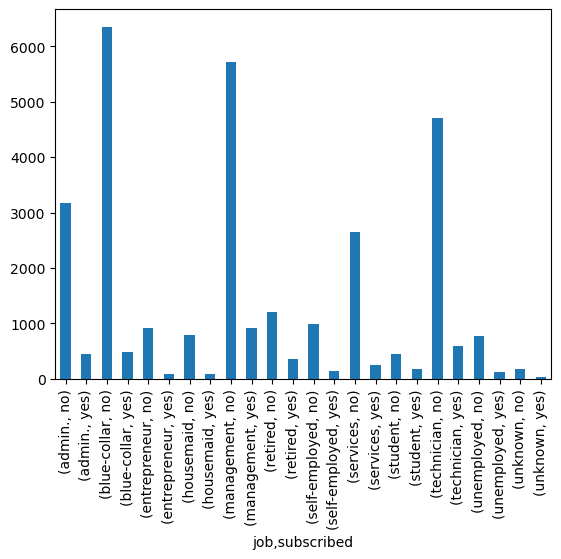

In [52]:
s.plot.bar()

In [77]:
s1=df1.groupby('age')['subscribed'].value_counts()

In [78]:
s1

age  subscribed
18   yes            5
     no             3
19   no            15
     yes            7
20   no            25
                   ..
90   yes            1
92   yes            1
93   yes            1
94   no             1
95   yes            1
Name: subscribed, Length: 145, dtype: int64

In [79]:
s2=df1.groupby('default')['subscribed'].value_counts()

In [80]:
s2

default  subscribed
no       no            27388
         yes            3674
yes      no              544
         yes              41
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='default,subscribed'>

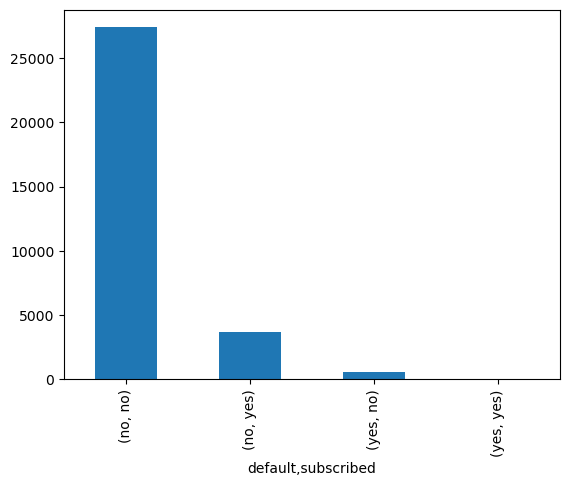

In [30]:
s2.plot.bar()

Here, client who has no previous default is more likely to subscribe than others.

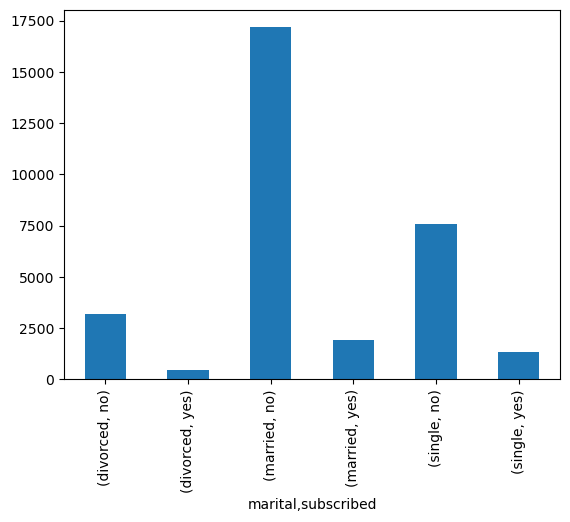

In [81]:
s3=df1.groupby('marital')['subscribed'].value_counts().plot.bar()

marital status have no impact

In [82]:
#replacing categorical values to numerical 
df1['subscribed'] = df1['subscribed'].map({'yes': 1, 'no': 0})

In [83]:
df1['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [84]:
#droping the subscribed column to split the data
x_train =df1.drop('subscribed',axis = 1)
y_train =df1['subscribed']

#using dummies to convert categorical columns 
x_train = pd.get_dummies(x_train)
df1 = pd.get_dummies(df1)
x_train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [85]:
x_train

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,116,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31643,40178,53,380,5,438,2,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
31644,19710,32,312,7,37,3,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31645,38556,57,225,15,22,7,337,12,0,0,...,0,0,1,0,0,0,1,0,0,0


In [86]:
y_train

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [87]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [88]:
regression = LinearRegression()

In [89]:
regression

LinearRegression()

In [90]:
#Training Testing and Spliting the model
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, Y_test = train_test_split(x_train,y_train,test_size=0.3,random_state=7)

In [91]:
#model building
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()
regression.fit(x_train,y_train)
Y_pred =regression.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.8876250658241179
